# The Sparks Foundation :Data Science and Business Analytics

### Author :Sejal Khedekar



# Task 6:Prediction using Decision Tree Algorithm

## Prediction using Supervised ML

In this task I created the decision tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier,it will be able to predict the right class accordingly.



##  Importing the required libraries and dataset 

In [31]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
import seaborn as sb

In [9]:
df=pd.read_csv('Downloads\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# checking N.A values in the iris dataset
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
# Dropping unnecessary Data in the iris dataset
df.drop('Id',axis=1,inplace=True)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring the dataset

In [13]:
df.info() #print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# checking N.A values in the iris dataset
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Visualization of Dataset

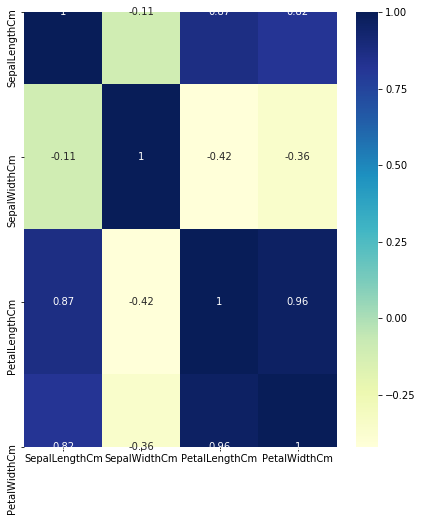

In [17]:
plt.figure(figsize=(7,8))
sb.heatmap(df.corr(),annot=True ,cmap="YlGnBu")


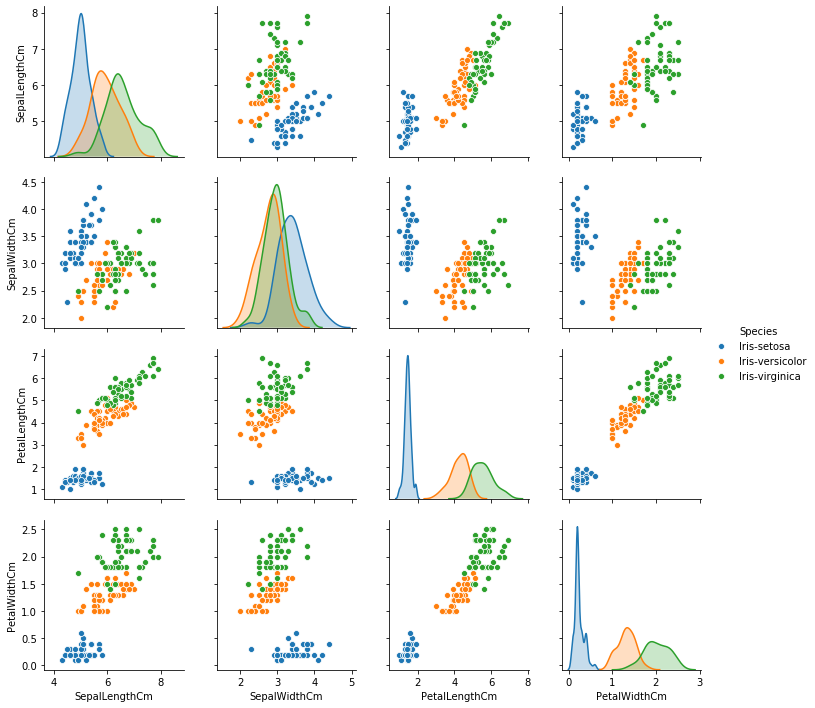

In [18]:
sb.pairplot(df, hue='Species');

## Preparing and Spliting the data

In [19]:
X=df.drop('Species',axis=1)
y=df['Species']

In [20]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

## Defining the decision tree classifier

In [21]:
#Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
DecisionTreeClassifier()
predictions=model.predict(X_test)

In [22]:
classification_report(y_test,predictions)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       0.92      1.00      0.96        12\n Iris-virginica       1.00      0.88      0.93         8\n\n       accuracy                           0.97        30\n      macro avg       0.97      0.96      0.96        30\n   weighted avg       0.97      0.97      0.97        30\n'

In [23]:
confusion_matrix(y_test,predictions)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [25]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [27]:
model.score(X_test, y_test)

0.9666666666666667

In [28]:
y_pred = model.predict(X_test)

In [29]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.9666666666666667


## Visualization of Decision tree

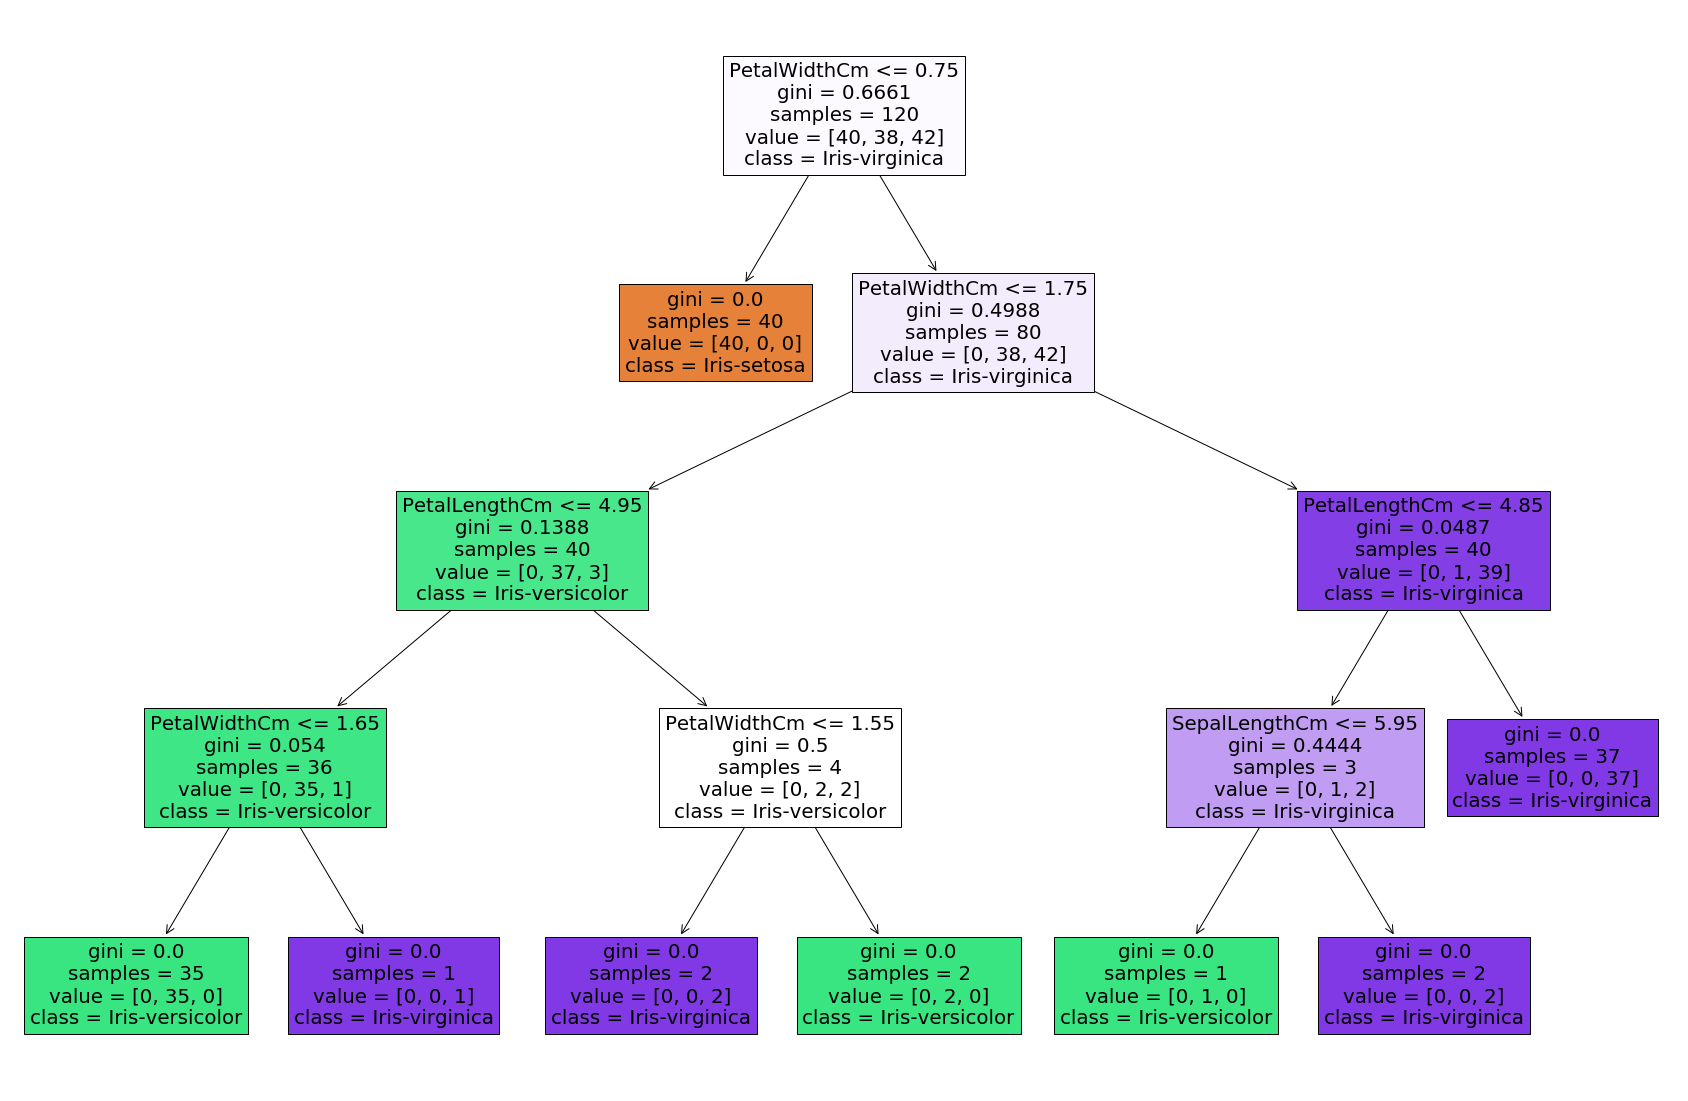

In [35]:
plt.figure(figsize=(30,20))

tree_img= plot_tree(model,feature_names = df.columns, class_names=df['Species'].unique().tolist(), 
                    precision=4,label="all",filled=True)
plt.show()

## Now you can feed any test data to this classifer and it would be able to predict the right class accordingly.¶